In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# to be used for Chi-Square and Cramer's V tests
from scipy.stats import chi2_contingency



Matplotlib is building the font cache; this may take a moment.


..


In [ ]:

train = pd.read_csv(os.path.join(os.pardir,"data","train.csv"))
test = pd.read_csv(os.path.join(os.pardir,"data","test.csv"))

# Quick look at data
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking for Null or Blank columns
train.isnull().sum()
train.duplicated().sum()
(train.isnull() | (train == '')).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

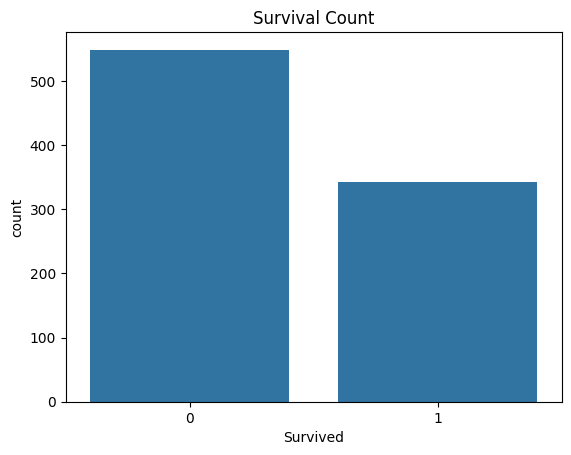

In [16]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

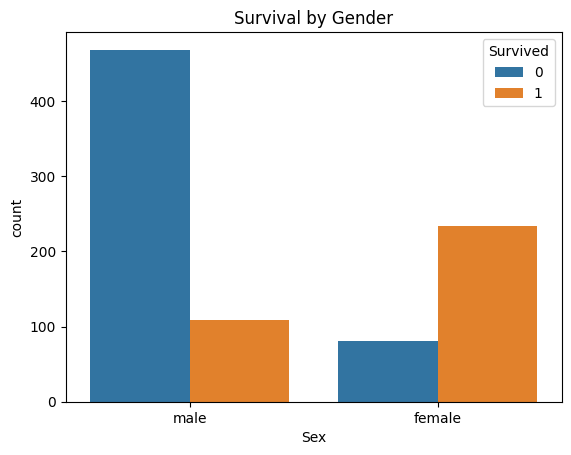

In [17]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

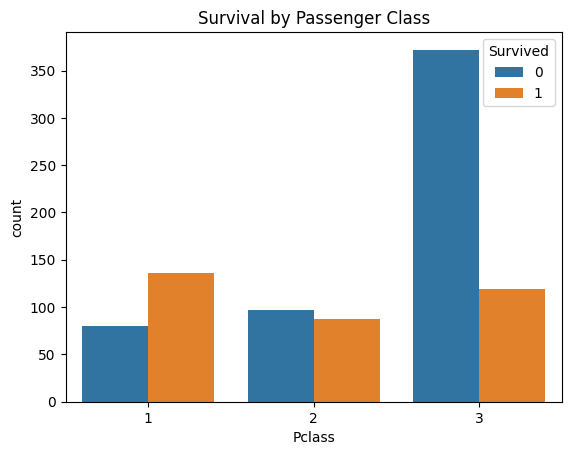

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

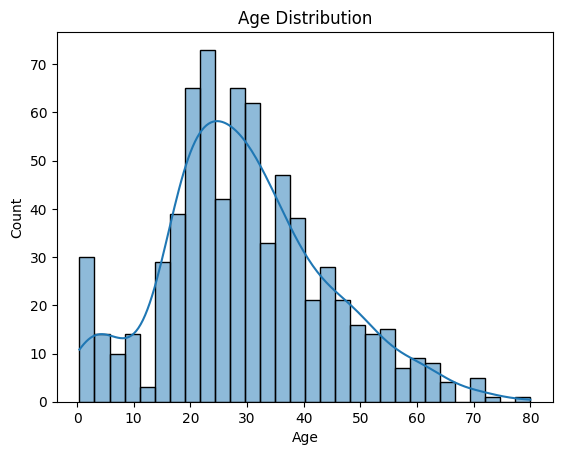

In [19]:
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

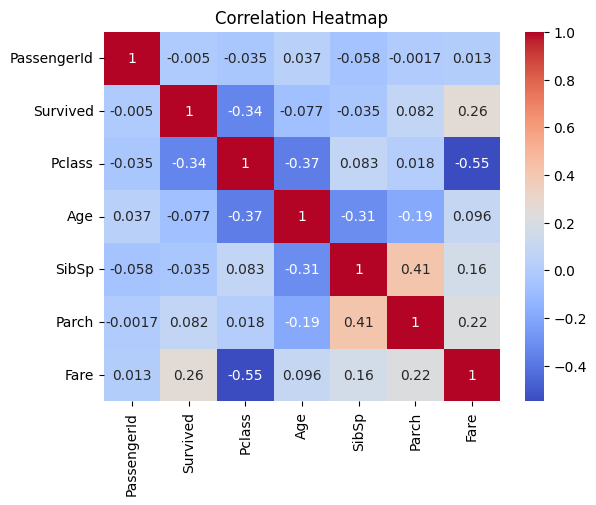

In [20]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Create a pre-process copy of the train dataset
train_pre_processed = train.copy()

### Exploring the PClass

PClass is a categorical data
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_61137/1771674447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


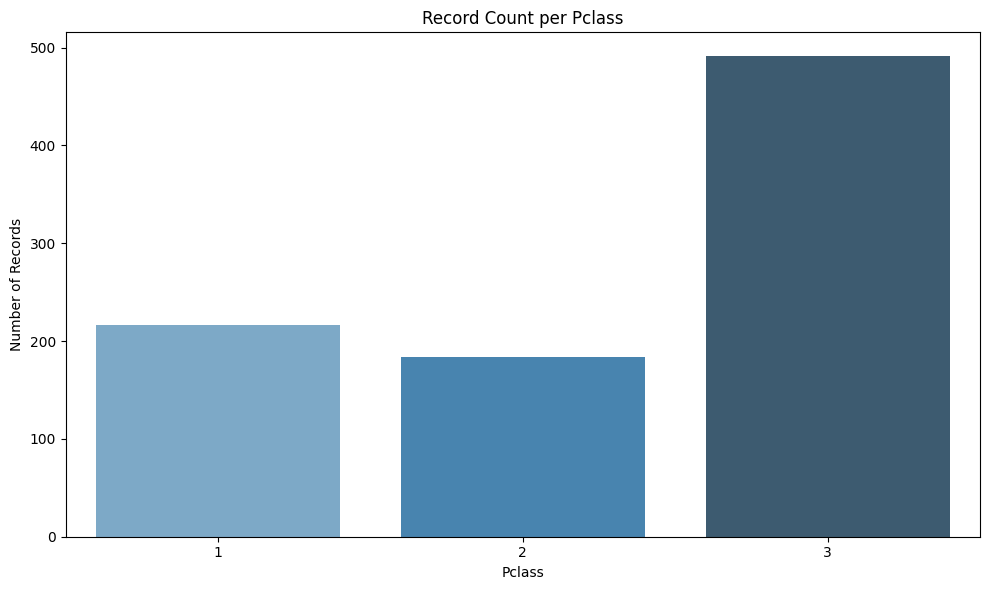

In [31]:
group_by_pclass = train_pre_processed.groupby('Pclass').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='Pclass',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Number of Records')
plt.title('Record Count per Pclass')
plt.tight_layout()

# Show plot
plt.show()

Since the PClass are categorical and only represented as a numeric, we will be applying Dummy Encoding.

In [33]:
pclass_dummy = pd.get_dummies(train_pre_processed['Pclass'], prefix='Pclass', drop_first=True).astype(int)
train_pre_processed = pd.concat([train_pre_processed,pclass_dummy],axis=1)

In [39]:
train_pre_processed.head()
#pd.get_dummies(train_pre_processed['Pclass'], prefix='Pclass', drop_first=True).astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


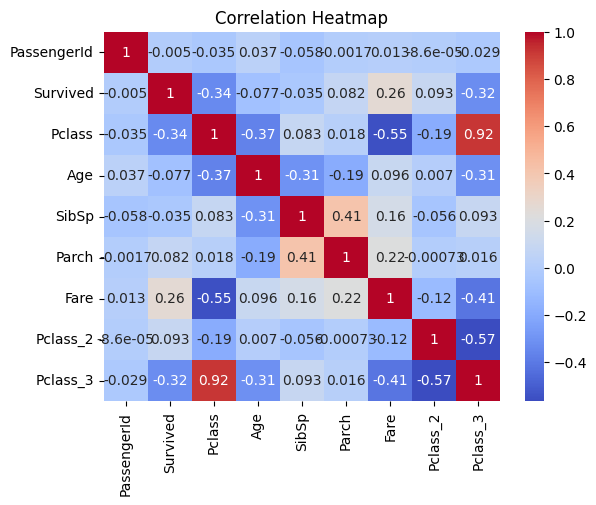

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.093349,-0.322308
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.188432,0.916673
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.006954,-0.312271
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.055932,0.092548
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.000734,0.015790
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.118557,-0.413333
Pclass_2,-0.000086,0.093349,-0.188432,0.006954,-0.055932,-0.000734,-0.118557,1.000000,-0.565210
Pclass_3,-0.029486,-0.322308,0.916673,-0.312271,0.092548,0.015790,-0.413333,-0.565210,1.000000


In [37]:
sns.heatmap(train_pre_processed.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

train_pre_processed.corr(numeric_only=True)

In [40]:
train_pre_processed.groupby(['Pclass_2','Pclass_3']).size().reset_index(name='number_of_records')

,Pclass_2,Pclass_3,number_of_records
0,0,0,216
1,0,1,491
2,1,0,184


### Perform Chi-Square and Cramer's V test

#### Chi-Square interpretation

To check if there is a relationship

| Output | Meaning |
|--------|---------|
| p < 0.05 | Statistically significant relationship -> the variables are associated |
| p >= 0.05 | No strong evidence of association -> the variables may be independent |

#### Cramer's V interpretation

To measure how strong that relationship is

| Cramer's V | Association Strength |
|---------------|----------------------|
| 0.00 -> 0.10 | Negligible |
| 0.10 -> 0.20 | Weak |
| 0.20 -> 0.40 | Moderate |
| 0.40 -> 0.60 | Strong |
| 0.60 -> 0.80 | Very Strong |
| 0.80 -> 1.00 | Near-perfect |


In [ ]:
# Create contingency table
table = pd.crosstab(train_pre_processed['Pclass'], train_pre_processed['Survived'])

# Run the test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23


In [43]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))  # Bias correction
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [44]:
v = cramers_v(train_pre_processed['Pclass'], train_pre_processed['Survived'])
print(f"Cramér’s V (Pclass vs Survived): {v:.3f}")

Cramér’s V (Pclass vs Survived): 0.337


### Result for PClass and Survived

| Test | Result | Interpretation |
|------|--------|----------------|
| Chi-Square | Statistic = 102.89, p-value ~ 4.5e-23 | Highly significant association between Pclass and Survived (not due to chance) |
| Cramer's V | 0.337 | Moderate association (fairly predictive) |


In [49]:
categorical_columns = train_pre_processed.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)
print(list(set(train_pre_processed.columns.tolist()) - set(categorical_columns)))

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['Parch', 'Pclass_2', 'Pclass_3', 'Pclass', 'Survived', 'Fare', 'Age', 'PassengerId', 'SibSp']


/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_61137/2978961796.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


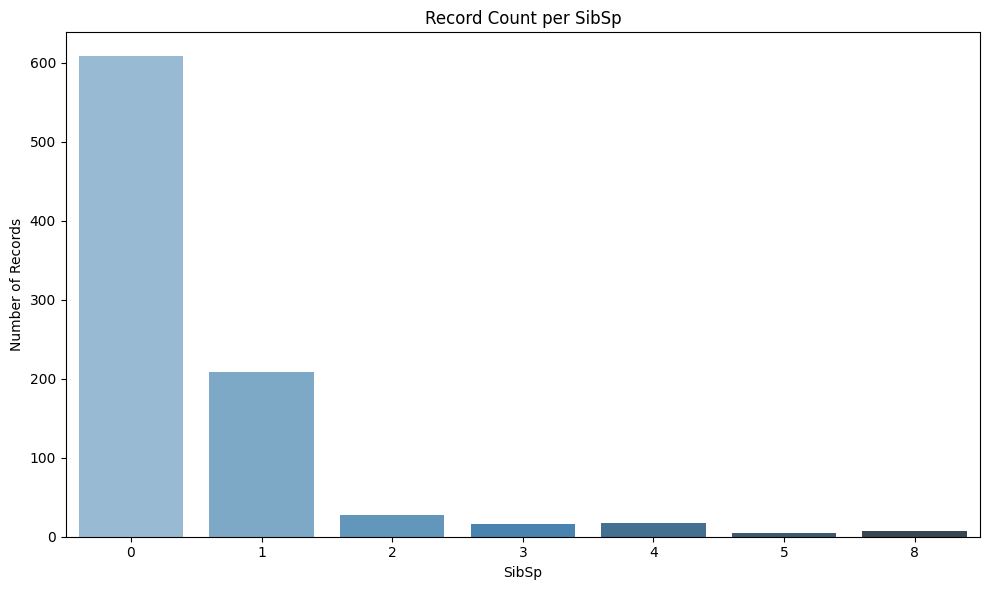

In [50]:
group_by_pclass = train_pre_processed.groupby('SibSp').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='SibSp',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('SibSp')
plt.ylabel('Number of Records')
plt.title('Record Count per SibSp')
plt.tight_layout()

# Show plot
plt.show()

/var/folders/1v/yp3pf2fd283b189f253c28m40000gn/T/ipykernel_61137/460401067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


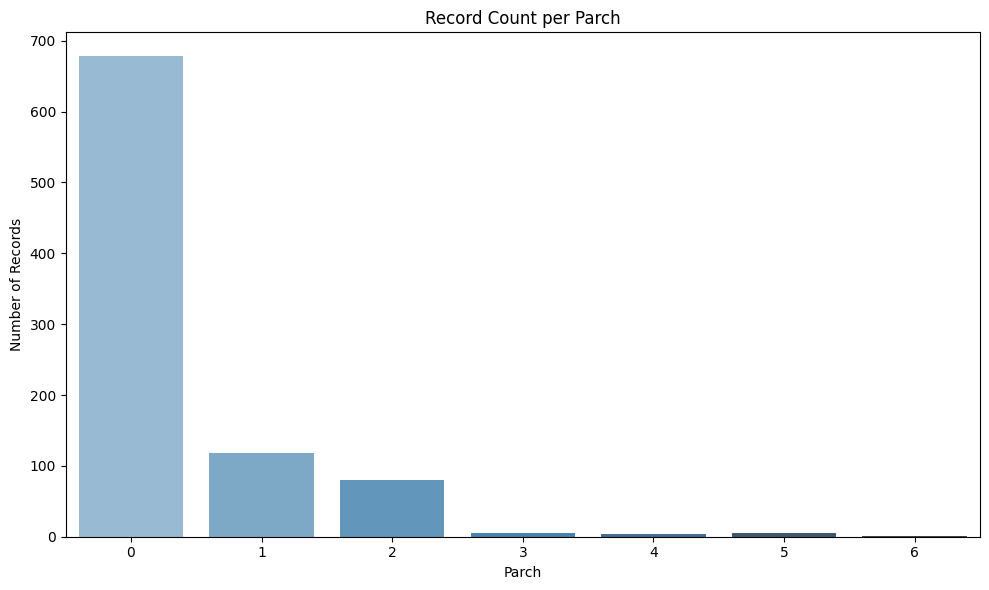

In [51]:
group_by_pclass = train_pre_processed.groupby('Parch').size().reset_index(name='number_of_records')

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(
    data=group_by_pclass,
    x='Parch',
    y='number_of_records',
    palette='Blues_d'
)

# Add labels and title
plt.xlabel('Parch')
plt.ylabel('Number of Records')
plt.title('Record Count per Parch')
plt.tight_layout()

# Show plot
plt.show()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64